# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1,x2,x3),axis=0)

#   설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

In [6]:
from sklearn.preprocessing import StandardScaler #스케일링
scaler = StandardScaler()
X_std = scaler.fit_transform(X) #fit메서드로 데이터 변환을 학습, transform매서드로 실제 데이터의 스케일 조정

In [7]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [8]:
features = X_std.T

In [9]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [10]:
cov_matrix = np.cov(features) #공분산구하는 np.cov사용-> 주어진값 바탕으로 공분산 평가

In [11]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [12]:
lin.eig(cov_matrix) #eigenvalue, eigenvector 구하기

(array([1.48756162, 0.94435407, 0.72597904]),
 array([[ 0.47018528, -0.85137353, -0.23257022],
        [-0.64960236, -0.15545725, -0.74421087],
        [-0.59744671, -0.50099516,  0.62614797]]))

In [13]:
eigenvalues = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

In [14]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [15]:
mat = np.zeros((3,3))

In [16]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [18]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

In [19]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T) #행렬곱 dot을 이용, 고유값 분해 곱으로 공분산 구함

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

In [20]:
eigenvectors.shape

(3, 3)

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [21]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T
#X, eigenvector 행렬곱을 통해 데이터를 projection

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [22]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [23]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X) #scaling
    features = x_std.T
    cov_matrix = np.cov(features) #공분산
    
    eigenvalues = lin.eig(cov_matrix)[0] #eigenvalue
    eigenvectors = lin.eig(cov_matrix)[1] #eigenvector
    
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T #모든 고유벡터 축으로 projection하여 새로운 축에 나타난 데이터 return

In [24]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요? #넵!
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #sklearn pca 사용 !

In [26]:
print(pca.fit_transform(X_std)) #fir, transform x는 이미 스케일링한 x_std 사용

[[-0.31019368 -1.08215716 -0.07983642]
 [-1.28092404 -0.43132556  0.13533091]
 [-1.38766381  0.78428014 -0.12911446]
 [-0.95087515 -1.15737142  1.6495519 ]
 [-1.84222365  0.88189889  0.11493111]
 [ 1.12563709 -0.52680338  0.06564012]
 [ 2.71174416  0.63290138  0.71195473]
 [ 0.03100441 -0.20059783 -0.50339479]
 [-2.29618509  0.07661447  0.01087174]
 [ 0.61585248 -0.205764    1.82651199]
 [ 1.73320252  1.29971699  0.09045178]
 [ 0.82366049 -0.57164535 -0.27123176]
 [-0.75619512  0.73995175 -0.76710616]
 [ 0.42344386  0.26555394 -1.41533681]
 [ 0.39581307 -1.64646874  0.24104031]
 [ 0.88581498  0.15195119 -0.82271209]
 [-0.24587691  0.39139878 -1.15801831]
 [-0.14741103 -1.22874561 -0.03110396]
 [ 0.7161265  -0.56781471 -0.86180345]
 [-0.24475107  2.39442622  1.19337361]]


In [27]:
MYPCA(X,3) #앞서 구한 값과 비교!하면 첫번째 값들이 +-가 반대로 나왔네용

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

In [2]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [3]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [7]:
#먼저 trian, test data split 진행!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
#pca를 사용하기 위해 미리 scaling진행

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)    #train set은 fit, transform 진행

In [9]:
X_test_std = scaler.transform(X_test)     #test set은 transform만 진행

먼저 주성분 개수를 정하기 위해 
1. Elbow point : 곡선의 기울기가 급격히 감소하는 지점
2. Kaiser’s Rule : 고유값 1 이상의 주성분들
3. 누적설명률이 70%~80% 이상인 지
이 세가지 확인!

In [10]:
#먼저 2번 Kaiser's Rule을 확인!

#먼저 trainset의 공분산을 구해주고
cov_mat = np.cov(X_train.T)

cov_mat.shape

(784, 784)

In [11]:
explain_values_raw, components_raw = lin.eig(cov_mat) #고유값eigenvalue를 구한다

pca_1 = len(explain_values_raw[explain_values_raw > 1]) #고유값이 1이상의 주성분들로 차원축소하는 pca


In [12]:
from sklearn.decomposition import PCA

pca = PCA(pca_1).fit(X_train_std)

pca_X_train = pca.transform(X_train_std)

pca_X_test = pca.transform(X_test_std)


In [13]:
components = pca.components_

In [14]:
pca_X_train.shape #확인 결과 2번으로는 주성분 개수를 655개로 줄여야 하지만 너무 많기 때문에
#다른 조건들도 확인하기로 결정하였습니다

(56000, 652)

In [ ]:
#그 다음 1번 elbow point를 확인해보기로 결정하였습니다!

In [15]:
sing_vals = range(pca.n_components_)
sing_vals
#앞서 줄인 651개 중에서 explained_variance_ratio를 통해
#이 때 explained variance란!
#각각의 주성분 벡터가 이루는 축에 projection한 결과의 분산의 비율, 즉 각 eigenvalue의 비율을 말함

range(0, 652)

In [16]:
eigvals = pca.explained_variance_ratio_

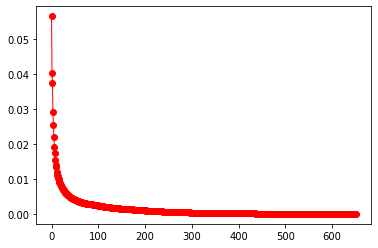

In [21]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)

(0, 40)

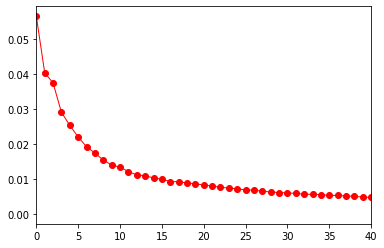

In [22]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=1)
plt.xlim(0,40)
#줄이고 줄인 결과적으로  30-40 정도가 적당하다고 판단했습니다

In [ ]:
#마지막으로 누적설명률을 판단했습니다

In [18]:
pca = PCA(n_components=0.8)


pca.fit(X_train_std)

pca.n_components_

148

In [20]:
pca = PCA(n_components=0.75)


pca.fit(X_train_std)

pca.n_components_

#scaling한 데이터는 120개 정도가 적당하다 판단했고

120

In [49]:
#그래서 스케일링하지 않은 데이터도 확인해보고싶어서
#스케일링하지 않은 데이터는 주성분개수 43 또는 33이 적당하다 판단했습니다

pca = PCA(n_components=0.8)


pca.fit(X_train)

pca.n_components_

43

In [48]:
pca = PCA(n_components=0.75)

pca.fit(X_train)

pca.n_components_

33

먼저 randomforest 모델을 사용했습니다

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)


In [24]:
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
new_X_train = pca.transform(X_train_std)
new_X_test = pca.transform(X_test_std)

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
clf.score(new_X_test,y_test)

#scaling 한 데이터 주성분 개수 120으로 했을 때 0.945

0.9451428571428572

In [ ]:
#스케일링을 안했을 때/ 주성분개수 43으로 해봤습니다

In [65]:
pca = PCA(n_components=43)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
clf.score(new_X_test,y_test)  
#스케일링하지 않은 데이터/randomforest 사용/주성분개수 43
#accuracy: 0.955

0.955

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)

In [61]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=33, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
clf.score(new_X_test,y_test)
#스케일링하지 않은 데이터/randomforest 사용/주성분개수 33
#accuracy: 0.953

0.9532857142857143

#두번째로 SVM모델 사용했습니다

In [ ]:
#먼저 scaling한 데이터

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)

In [29]:
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
new_X_train = pca.transform(X_train_std)
new_X_test = pca.transform(X_test_std)

In [31]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf') #rbf kernel만 파라미터 설정하고 돌려보았습니다

svc.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
svc.score(new_X_test,y_test)
#스케일링한 데이터, 주성분 개수 120
#0.969

0.9690714285714286

In [ ]:
#스케일링하지 않은 데이터 주성분개수 43/33개로 해보았습니다

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=43)

In [70]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [71]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [72]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf') #rbf kernel만 파라미터 설정하고 돌려보았습니다

svc.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
svc.score(new_X_test,y_test)

#스케일링하지 않은 데이터/svm 사용/주성분개수 43
#accuracy: 0.9822!!!!!

0.9822142857142857

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)

In [75]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=33, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
new_X_train = pca.transform(X_train)
new_X_test = pca.transform(X_test)

In [77]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf')

svc.fit(new_X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
svc.score(new_X_test,y_test)

#스케일링 안한 데이터/ SVM / 주성분개수 33
#accuracy 0.98

0.9800714285714286

In [ ]:
#스케일링하지 않은 데이터에, 주성분 개수가 43이 제일 적당한 것 같고 svm이 좋은 모델임을 확인하였습니다!

#가장 좋았던 accuracy는 0.9822!